In [ ]:
# Install required libraries
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Allow google colab to access files in google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Display all libraries used in this model training
!pip list

In [ ]:
# Import libraries
import tensorflow as tf
import os

In [ ]:
# Search for training dataset
os.listdir('drive/MyDrive/AI/training_set_with_labels')

['1', '0', '8', '2', '7', '9', '5', '4', '3', '6']

In [ ]:
# Limit the GPI usage
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

#**Load Training Images**

- Visualize the images that will used for training model

In [ ]:
# Import libraries for image loading
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# This is the root directory to all the training datasets
data_dir = 'drive/MyDrive/AI/training_set_with_labels'

In [ ]:
# This is how the images can be convert to binary images
img = cv2.imread('drive/MyDrive/AI/training_set_with_labels/8/70_resized.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 127, 1, cv2.THRESH_BINARY)
print(binary_image)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 

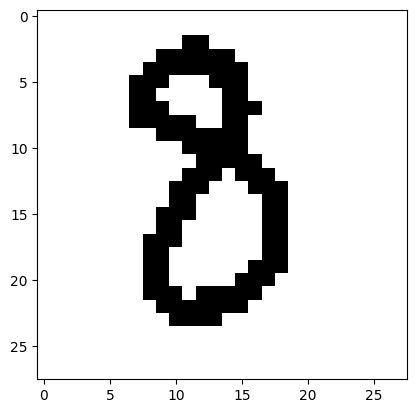

In [ ]:
# Plot the binaru image
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=1)
plt.show()

In [ ]:
# Load all the training dataset with a data pipeline using tensorflow and divide them into batches
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=20, image_size=(28, 28))

Found 500 files belonging to 10 classes.


In [ ]:
# Divide the pixel values by 255 scales them to the range of 0 to 1
data = data.map(lambda x, y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

In [ ]:
# Print the batch size
print(batch[0].shape)
print(len(data))

(20, 28, 28, 3)
25


There are 25 batches of data, each batch with 20 images, each image with 28*28 dimension and 3 color channels

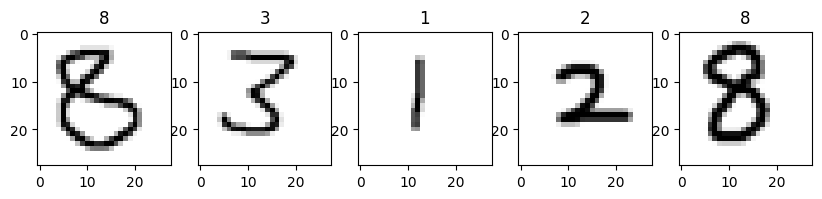

In [ ]:
# Visualise a few training set using matplotlib
fig, ax = plt.subplots(ncols=5, figsize=(10, 10))
for index, image in enumerate(batch[0][:5]):
  ax[index].imshow(image)
  ax[index].title.set_text(batch[1][index])

# **Split Data into Training, Validation and Testing Sets**

- Split the data to training, validation and testing set for training model

In [ ]:
train_size = int(len(data)*.7) # 70% of the data is used for training the model
val_size = int(len(data)*.2) # 20% of the data is used for validation the model
test_size = int(len(data)*.1) # 10% of the data is used for testing the model

In [ ]:
# Supposedly have 25 batches, 1 batch is missing due to round down of number of batch for train, validate and test due to selection of batch size
print(f'Training Batch: {train_size}')
print(f'Validation Batch: {val_size}')
print(f'Testing Batch: {test_size}')

Training Batch: 17
Validation Batch: 5
Testing Batch: 2


In [ ]:
train = data.take(train_size) # Split the data for training set
val = data.skip(train_size).take(val_size) # Split the data for validation set
test = data.skip(train_size + val_size).take(test_size) # Split the data for testing set

# **Build the Digit Recognition Model**

- CNN model is built for recognizing the handwritten digits

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

# Adding 4 convolutional layer
# 128 3*3 kernels
# Kernel slide 1 pixel each step
model.add(Conv2D(128, (4, 4), 1, activation='relu', input_shape=(28, 28, 3)))
model.add(Conv2D(128, (4, 4), 1, activation='relu'))
model.add(Conv2D(128, (4, 4), 1, activation='relu'))
model.add(Conv2D(128, (4, 4), 1, activation='relu'))
# Adding 1 max pooling layer
model.add(MaxPooling2D())
# Adding 1 faltten layer
model.add(Flatten())
# Adding 3 dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
# There will be 10 classes for output layer
# The output layer uses softmax activation function to get a total output probability of 1 for all classes
# Sigmoid cannot be used as the output layer because it is not a binary classification

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# The model compiles with adam optimizer
# Sparse_categorical_crossentropy is used as the loss function instead of categorical_crossentropy
# This is because the labels of the classification are integer and not a one-hot array containing the probable match for each category
# Accuracy metrics is used for evaluation of the model
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_17 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_18 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                      

In [ ]:
# Setting up TensorBoard for monitoring the training of model
log_dir = 'drive/MyDrive/AI/log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [ ]:
# Determine the size of training set (batch number)
train_cardinality = tf.data.experimental.cardinality(train).numpy()
print("Training set size:", train_cardinality)

# Iterate over the "train" dataset and print the content
for image, label in train:
    # Print image shape
    print("Image shape:", image.shape)
    # Print label value
    print("Label:", label)

Training set size: 17
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([7 2 4 7 8 4 0 0 3 7 1 4 0 9 1 9 1 8 6 0], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([5 6 0 6 0 4 2 6 9 2 0 5 9 5 0 8 4 1 0 8], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([2 6 6 8 7 2 1 1 6 5 3 8 9 3 6 4 0 5 8 4], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([0 7 4 5 7 8 0 1 1 5 5 9 4 0 8 1 1 7 1 2], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([9 0 0 5 8 0 4 4 7 8 4 7 4 3 5 7 4 7 9 6], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([8 6 5 5 4 9 6 1 6 7 0 1 9 3 5 3 9 4 3 2], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([7 7 9 8 3 5 7 7 8 1 9 9 5 6 7 8 5 4 6 5], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([4 4 5 5 3 0 3 6 5 3 9 1 6 4 2 8 4 8 8 1], shape=(20,), dtype=int32)
Image shape: (20, 28, 28, 3)
Label: tf.Tensor([4 9 2 1 3 3

In [ ]:
# Fit the training dataset to the model with 10 epochs
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
17/17 [==============================] - 20s 1s/step - loss: 0.0341 - accuracy: 0.9853 - val_loss: 0.0800 - val_accuracy: 0.9900
Epoch 2/10
17/17 [==============================] - 22s 1s/step - loss: 0.0295 - accuracy: 0.9941 - val_loss: 0.1281 - val_accuracy: 0.9600
Epoch 3/10
17/17 [==============================] - 21s 1s/step - loss: 0.0702 - accuracy: 0.9824 - val_loss: 0.0837 - val_accuracy: 0.9700
Epoch 4/10
17/17 [==============================] - 21s 1s/step - loss: 0.0532 - accuracy: 0.9882 - val_loss: 0.0202 - val_accuracy: 0.9900
Epoch 5/10
17/17 [==============================] - 22s 1s/step - loss: 0.0405 - accuracy: 0.9853 - val_loss: 0.0285 - val_accuracy: 0.9900
Epoch 6/10
17/17 [==============================] - 21s 1s/step - loss: 0.0215 - accuracy: 0.9912 - val_loss: 0.0556 - val_accuracy: 0.9900
Epoch 7/10
17/17 [==============================] - 20s 1s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 8/10
17/17 [==

In [ ]:
# Print the log data during training
hist.history

{'loss': [0.03411915898323059,
  0.029505597427487373,
  0.07017377763986588,
  0.05324811860918999,
  0.040481336414813995,
  0.021454667672514915,
  0.0042796372435987,
  0.0007485368405468762,
  0.00020986532035749406,
  0.0004340014420449734],
 'accuracy': [0.9852941036224365,
  0.9941176176071167,
  0.9823529124259949,
  0.9882352948188782,
  0.9852941036224365,
  0.9911764860153198,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.07999814301729202,
  0.12811799347400665,
  0.08369387686252594,
  0.02018771320581436,
  0.02849770523607731,
  0.05557156726717949,
  0.003264050465077162,
  0.025439299643039703,
  0.001000624499283731,
  0.0005450728931464255],
 'val_accuracy': [0.9900000095367432,
  0.9599999785423279,
  0.9700000286102295,
  0.9900000095367432,
  0.9900000095367432,
  0.9900000095367432,
  1.0,
  0.9900000095367432,
  1.0,
  1.0]}

# **Plot Model Performances**

- Visualize how the fitting process undergone during each epoch

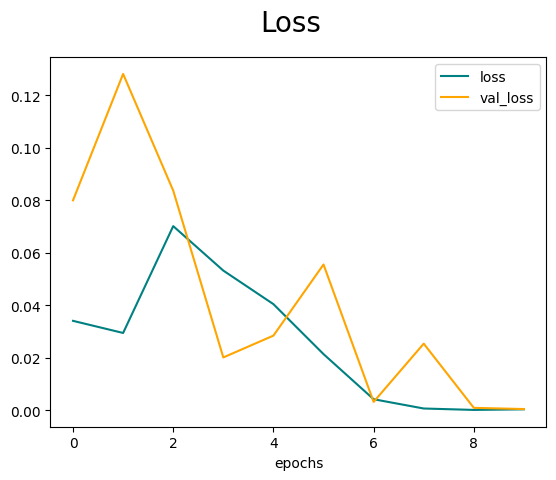

In [ ]:
# Plot the graph of loss against epoch
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.xlabel('epochs')
plt.show()

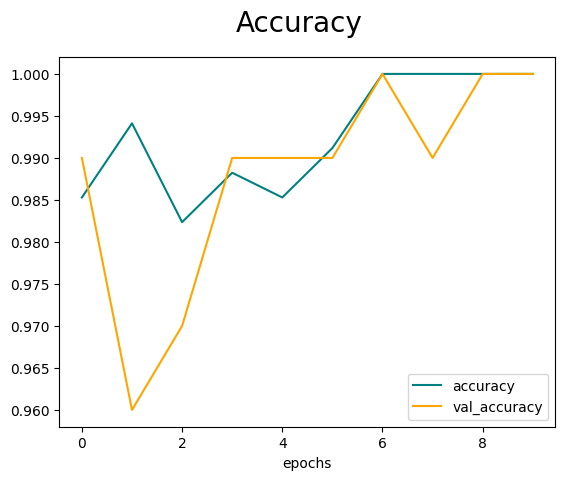

In [ ]:
# Plot the graph of accuracy against epoch
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.xlabel('epochs')
plt.show()

# **Evaluation of Model**

- Evaluate the performance of Digit Recognition Model with different metrics used for classification model



In [ ]:
# Import evaluation metric libraries
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
# Define a class for calculating F1 Score

class F1Score(tf.keras.metrics.Metric):

    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2*((precision*recall)/(precision+recall+tf.keras.backend.epsilon()))

In [ ]:
# Calculate and print the result of evaluation metric when the model predicts the testing batch

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()
f1 = F1Score()

for batch in test.as_numpy_iterator():
  X, y = batch
  y_pred = model.predict(X)
  y_pred_classes = tf.argmax(y_pred, axis=1)
  pre.update_state(y, y_pred_classes)
  re.update_state(y, y_pred_classes)
  acc.update_state(y, y_pred_classes)
  f1.update_state(y, y_pred_classes)

print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())
print(f'F1 Score: {f1.result().numpy()}')

1/1 [==============================] - 0s 25ms/step
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
F1 Score: 1.0


# **Testing of Model**

- Test the performance of Digit Recognition Model using 50 unseen testing samples

[['drive/MyDrive/AI/test_set_with_labels/0/YO_0_resized.png', 'drive/MyDrive/AI/test_set_with_labels/0/HT_0_resized.png', 'drive/MyDrive/AI/test_set_with_labels/0/ZY_0_resized.png', 'drive/MyDrive/AI/test_set_with_labels/0/CY_0_resized.png', 'drive/MyDrive/AI/test_set_with_labels/0/YJ_0_resized.png'], ['drive/MyDrive/AI/test_set_with_labels/1/HT_1_resized.png', 'drive/MyDrive/AI/test_set_with_labels/1/YO_1_resized.png', 'drive/MyDrive/AI/test_set_with_labels/1/YJ_1_resized.png', 'drive/MyDrive/AI/test_set_with_labels/1/CY_1_resized.png', 'drive/MyDrive/AI/test_set_with_labels/1/ZY_1_resized.png'], ['drive/MyDrive/AI/test_set_with_labels/2/YO_2_resized.png', 'drive/MyDrive/AI/test_set_with_labels/2/YJ_2_resized.png', 'drive/MyDrive/AI/test_set_with_labels/2/HT_2_resized.png', 'drive/MyDrive/AI/test_set_with_labels/2/CY_2_resized.png', 'drive/MyDrive/AI/test_set_with_labels/2/ZY_2_resized.png'], ['drive/MyDrive/AI/test_set_with_labels/3/YJ_3_resized.png', 'drive/MyDrive/AI/test_set_with_

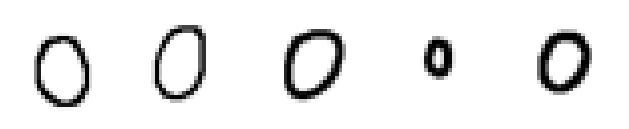

drive/MyDrive/AI/test_set_with_labels/1/HT_1_resized.png
drive/MyDrive/AI/test_set_with_labels/1/YO_1_resized.png
drive/MyDrive/AI/test_set_with_labels/1/YJ_1_resized.png
drive/MyDrive/AI/test_set_with_labels/1/CY_1_resized.png
drive/MyDrive/AI/test_set_with_labels/1/ZY_1_resized.png


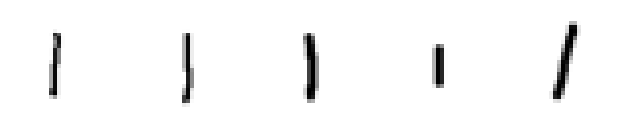

drive/MyDrive/AI/test_set_with_labels/2/YO_2_resized.png
drive/MyDrive/AI/test_set_with_labels/2/YJ_2_resized.png
drive/MyDrive/AI/test_set_with_labels/2/HT_2_resized.png
drive/MyDrive/AI/test_set_with_labels/2/CY_2_resized.png
drive/MyDrive/AI/test_set_with_labels/2/ZY_2_resized.png


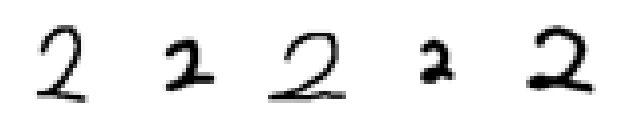

drive/MyDrive/AI/test_set_with_labels/3/YJ_3_resized.png
drive/MyDrive/AI/test_set_with_labels/3/HT_3_resized.png
drive/MyDrive/AI/test_set_with_labels/3/YO_3_resized.png
drive/MyDrive/AI/test_set_with_labels/3/ZY_3_resized.png
drive/MyDrive/AI/test_set_with_labels/3/CY_3_resized.png


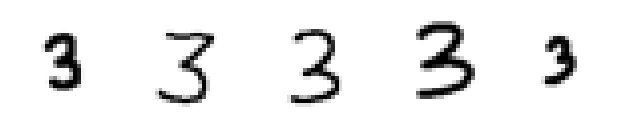

drive/MyDrive/AI/test_set_with_labels/4/HT_4_resized.png
drive/MyDrive/AI/test_set_with_labels/4/YO_4_resized.png
drive/MyDrive/AI/test_set_with_labels/4/YJ_4_resized.png
drive/MyDrive/AI/test_set_with_labels/4/ZY_4_resized.png
drive/MyDrive/AI/test_set_with_labels/4/CY_4_resized.png


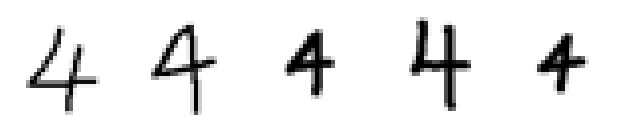

drive/MyDrive/AI/test_set_with_labels/5/YJ_5_resized.png
drive/MyDrive/AI/test_set_with_labels/5/HT_5_resized.png
drive/MyDrive/AI/test_set_with_labels/5/YO_5_resized.png
drive/MyDrive/AI/test_set_with_labels/5/CY_5_resized.png
drive/MyDrive/AI/test_set_with_labels/5/ZY_5_resized.png


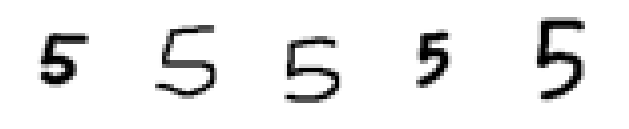

drive/MyDrive/AI/test_set_with_labels/6/HT_6_resized.png
drive/MyDrive/AI/test_set_with_labels/6/YO_6_resized.png
drive/MyDrive/AI/test_set_with_labels/6/ZY_6_resized.png
drive/MyDrive/AI/test_set_with_labels/6/CY_6_resized.png
drive/MyDrive/AI/test_set_with_labels/6/YJ_6_resized.png


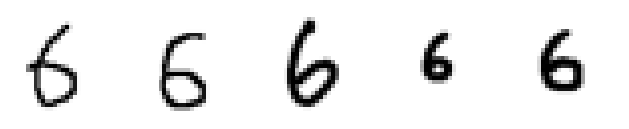

drive/MyDrive/AI/test_set_with_labels/7/YO_7_resized.png
drive/MyDrive/AI/test_set_with_labels/7/HT_7_resized.png
drive/MyDrive/AI/test_set_with_labels/7/YJ_7_resized.png
drive/MyDrive/AI/test_set_with_labels/7/CY_7_resized.png
drive/MyDrive/AI/test_set_with_labels/7/ZY_7_resized.png


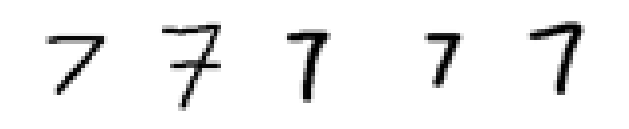

drive/MyDrive/AI/test_set_with_labels/8/YO_8_resized.png
drive/MyDrive/AI/test_set_with_labels/8/HT_8_resized.png
drive/MyDrive/AI/test_set_with_labels/8/CY_8_resized.png
drive/MyDrive/AI/test_set_with_labels/8/ZY_8_resized.png
drive/MyDrive/AI/test_set_with_labels/8/YJ_8_resized.png


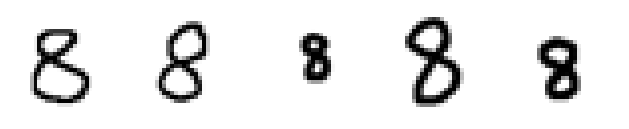

drive/MyDrive/AI/test_set_with_labels/9/HT_9_resized.png
drive/MyDrive/AI/test_set_with_labels/9/YO_9_resized.png
drive/MyDrive/AI/test_set_with_labels/9/YJ_9_resized.png
drive/MyDrive/AI/test_set_with_labels/9/CY_9_resized.png
drive/MyDrive/AI/test_set_with_labels/9/ZY_9_resized.png


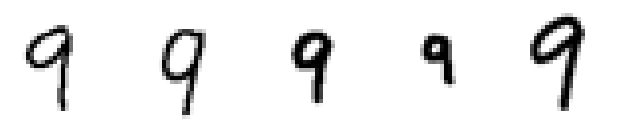

In [ ]:
# Load the testing set images

testing_dir = 'drive/MyDrive/AI/test_set_with_labels'
member_list = ['CY', 'YJ', 'YO', 'HT', 'ZY']

testing_files = []

# load the testing dataset to test the accuracy of the trained model
for i in range(10):
  temp = []
  curr_dir = f'{testing_dir}/{i}'
  for filename in os.listdir(curr_dir):
    # Check if the file has an image extension
    if filename.endswith('.png'):
      # Create the full file path
      file_path = os.path.join(curr_dir, filename)
      # Append the file path to the list
      temp.append(file_path)

  testing_files.append(temp)

print(testing_files)
print(len(testing_files))

loaded_images = []

for i in range(len(testing_files)):
    temp = []
    fig, axes = plt.subplots(1, 5)

    # Display each image in a separate subplot
    for j in range(len(testing_files[i])):
      print(testing_files[i][j])
      img = cv2.imread(testing_files[i][j])
      temp.append(img)
      # Display the image on the subplot
      axes[j].imshow(img)
      # Remove the axis labels for each subplot
      axes[j].axis('off')

    loaded_images.append(temp)
    # Adjust the spacing between subplots
    plt.tight_layout()
    # Show the figure
    plt.show()

In [ ]:
# Predict the handwritten digits with model and print their probabilities for the output

test_pre = Precision()
test_re = Recall()
test_acc = CategoricalAccuracy()
test_f1 = F1Score()

pred_res = []

for i in range(len(loaded_images)):
  print(f'iteration: {i}')
  temp = []
  for j in range(len(loaded_images[i])):
    y_pred = model.predict(np.expand_dims(loaded_images[i][j]/255, 0))
    y_pred_classes = tf.argmax(y_pred, axis=1)
    print(y_pred)
    print(y_pred_classes)
    temp.append(int(y_pred_classes))

    y_true_class = tf.expand_dims(i, 0)
    y_pred_classes = tf.expand_dims(y_pred_classes, 0)

    test_pre.update_state(y_true_class, y_pred_classes)
    test_re.update_state(y_true_class, y_pred_classes)
    test_acc.update_state(y_true_class, y_pred_classes)
    test_f1.update_state(y_true_class, y_pred_classes)

  pred_res.append(temp)

print(pred_res)

iteration: 0
1/1 [==============================] - 0s 179ms/step
[[9.9984372e-01 3.1197002e-16 2.0487469e-07 2.2996967e-11 6.5455752e-09
  5.6824561e-14 4.2152406e-09 3.7832622e-13 1.5597205e-04 5.1866371e-12]]
tf.Tensor([0], shape=(1,), dtype=int64)
1/1 [==============================] - 0s 19ms/step
[[9.3777549e-01 1.9116085e-13 5.2203052e-02 1.6748218e-07 1.9771750e-07
  3.8849596e-13 2.1740587e-09 1.4356118e-05 1.0000862e-02 5.9456106e-06]]
tf.Tensor([0], shape=(1,), dtype=int64)
1/1 [==============================] - 0s 21ms/step
[[1.0000000e+00 2.5337997e-26 9.1723482e-13 1.7145956e-22 1.0823054e-16
  3.5789518e-23 1.5443465e-15 1.0709154e-19 7.1640536e-19 1.5589067e-23]]
tf.Tensor([0], shape=(1,), dtype=int64)
1/1 [==============================] - 0s 19ms/step
[[9.0621787e-01 1.1455452e-07 7.1559793e-05 1.5279793e-06 7.2780726e-03
  5.3087738e-06 1.4516676e-02 6.4087811e-07 1.4542672e-02 5.7365473e-02]]
tf.Tensor([0], shape=(1,), dtype=int64)
1/1 [=============================

In [ ]:
# Print the result of performance metrics using unseen testing samples
print(f'Accuracy: {test_acc.result().numpy()}')
print(f'Precision: {test_pre.result().numpy()}')
print(f'Recall: {test_re.result().numpy()}')
print(f'F1 Score: {test_f1.result().numpy()}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# **Save and Load the Model**

- Save the model's parameters to the google drive
- Load the saved model from google drive

In [ ]:
# Save the model to google drive
model.save(os.path.join('drive/MyDrive/AI/models', 'digit_recognition_model.h5'))

In [ ]:
# Load the model from google drive
from tensorflow.keras.models import load_model
new_model = load_model(os.path.join('drive/MyDrive/AI/models', 'digit_recognition_model.h5'))

# **Get Explainer for the Digit Recognition Model**

In [ ]:
!pip install --upgrade shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 31.4 MB/s eta 0:00:00


In [ ]:
# Import libraries
import glob
from PIL import Image
import shap
from tensorflow.python.ops.numpy_ops import np_config
import random
np_config.enable_numpy_behavior()

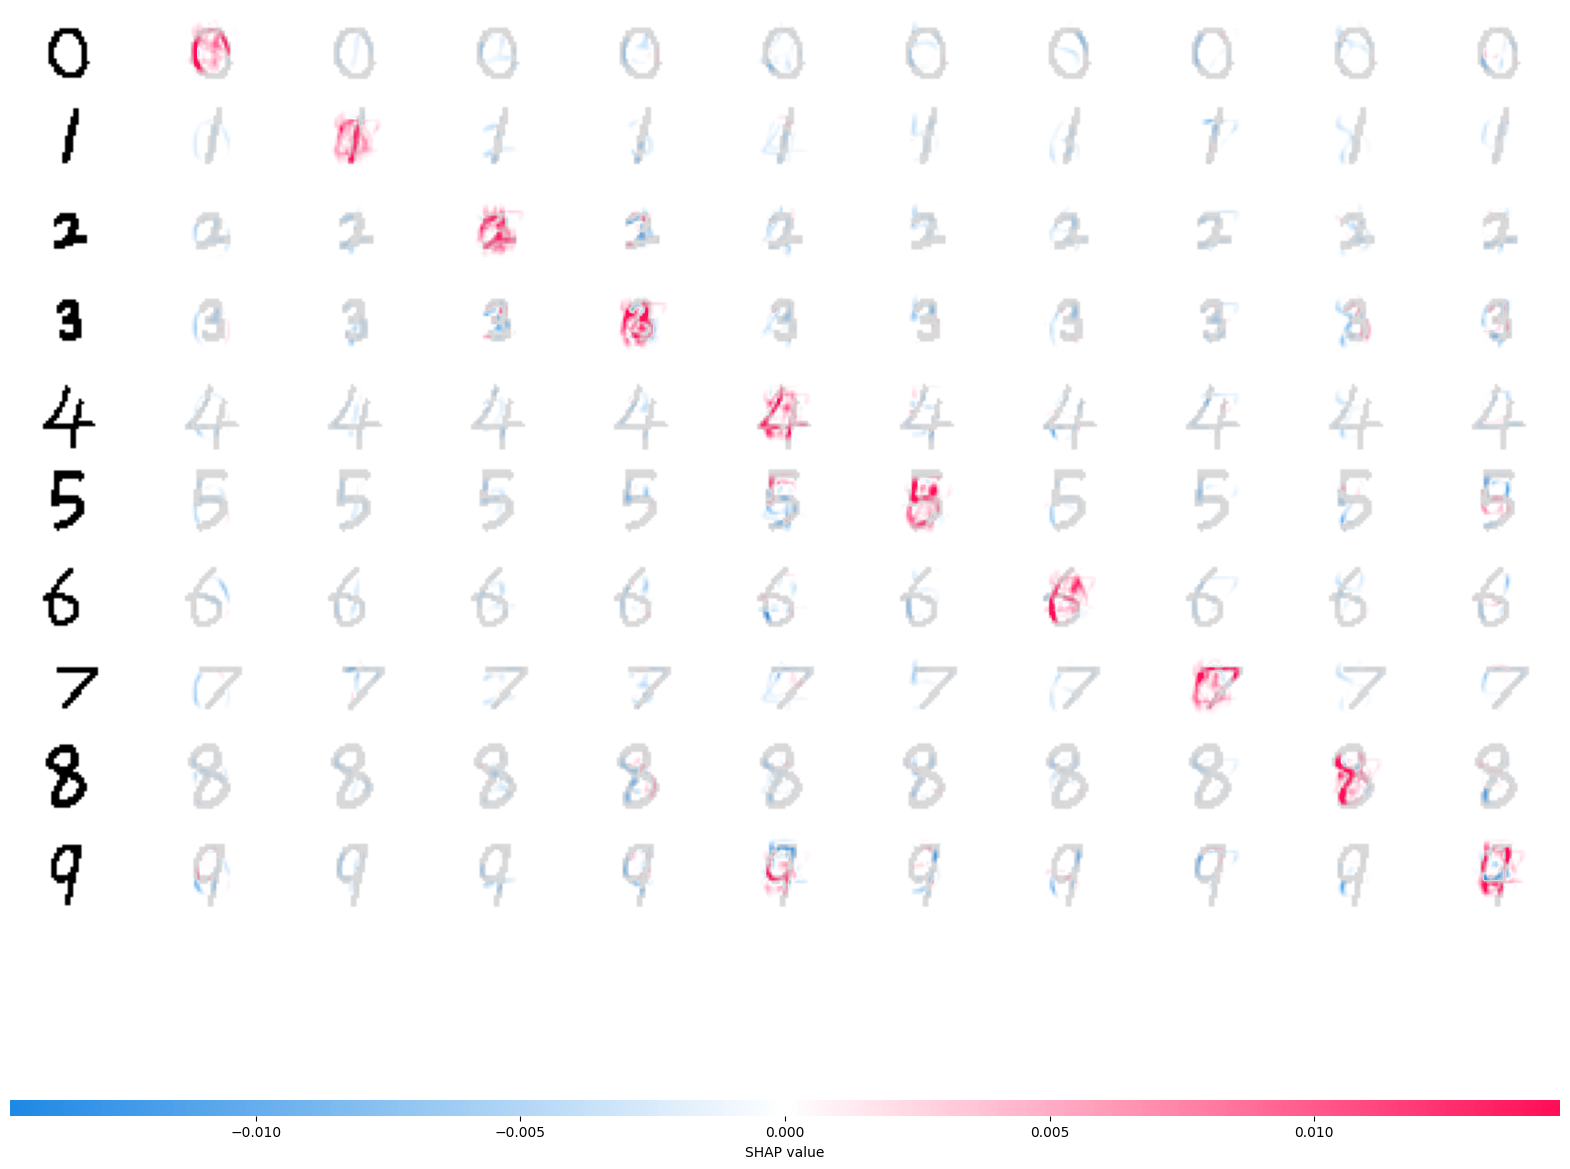

In [ ]:
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    if img.shape[2] == 4:  # If the image has 4 channels
        img = img[:, :, :3]  # Discard the alpha channel
    img = img / 255.0  # Normalize

    # Use PIL for binarization
    threshold = 215
    img_pil = Image.fromarray((img * 255).astype(np.uint8))  # Convert to PIL Image
    img_bin = img_pil.convert("L").point(lambda x: 0 if x < threshold else 255, mode="1")
    img_bin = np.array(img_bin, dtype=np.float32) # Convert to array and normalize
    img_bin = 1 - img_bin  # Invert binary image

    # Add batch dimension
    img = np.expand_dims(img, 0)
    img_bin = np.expand_dims(img_bin, -1)  # Add channel dimension
    return img, img_bin


samples_per_class = 1  # We only need one representative sample per class
representative_samples = []
representative_images = []

# Load one image per class from each class folder
for i in range(10):
    image_paths = glob.glob(f'{testing_dir}/{i}/*_resized.png')

    selected_image_path = random.choice(image_paths)
    img, img_bin = load_and_preprocess_image(selected_image_path)
    representative_samples.append(img)
    representative_images.append(img_bin)  # Add an extra dimension for grayscale

# Convert to Tensor for compatibility with SHAP
to_explain = tf.convert_to_tensor(np.concatenate(representative_samples))

# Convert representative_images to a numpy array
representative_images = np.array(representative_images)

# Create an explainer object
explainer = shap.DeepExplainer(new_model, to_explain)

# Calculate SHAP values
shap_values = explainer.shap_values(to_explain)

shap.image_plot(shap_values, -representative_images)

#**Build Owner Recognition Model**

- Build ten CNN models that can identify the owner of handwritten digits
- Each CNN model is trained on the same handwritten digitS collected from every member

- Label for each member
  - 0: Chen Ching Yen (CY)
  - 1: Wong Yan Jian (YJ)
  - 2: Yap Yun Onn (YO)
  - 3: Lim Hon Ting (HT)
  - 4: Lim Zheng Yu (ZY)


In [ ]:
member_list = ['CY', 'YJ', 'YO', 'HT', 'ZY']

In [ ]:
data_dir = 'drive/MyDrive/AI/training_set_for_each_digit'

In [ ]:
# Load the data and split them into batches
# Split the data to training, validation and testing set

print(f'Model: {0}')
curr_dir = f'{data_dir}/{0}_classification'
print(curr_dir)
data = tf.keras.utils.image_dataset_from_directory(curr_dir, batch_size=10, image_size=(28, 28))


data = data.map(lambda x, y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Supposedly have 5 batches, 0 batch is for testing due to round down of number of batch for train, validate and test due to selection of batch size
print(f'Training Batch: {train_size}')
print(f'Validation Batch: {val_size}')
print(f'Testing Batch: {test_size}')

Model: 0
drive/MyDrive/AI/training_set_for_each_digit/0_classification
Found 50 files belonging to 5 classes.
Training Batch: 3
Validation Batch: 1
Testing Batch: 0


Modal: 0
drive/MyDrive/AI/training_set_for_each_digit/0_classification
Found 50 files belonging to 5 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_17 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_18 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_4

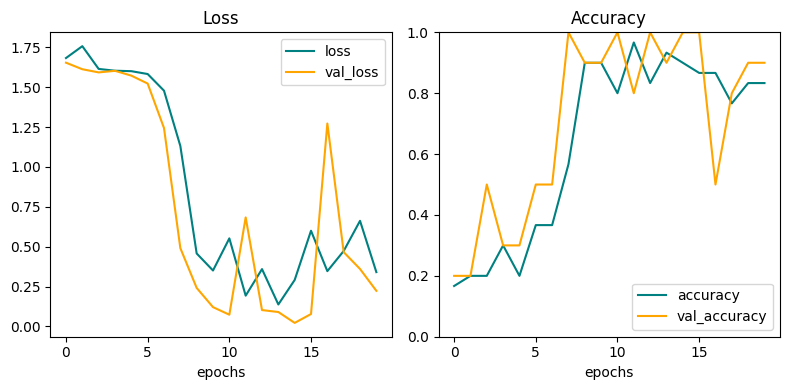

Modal: 1
drive/MyDrive/AI/training_set_for_each_digit/1_classification
Found 50 files belonging to 5 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_21 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_22 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_5

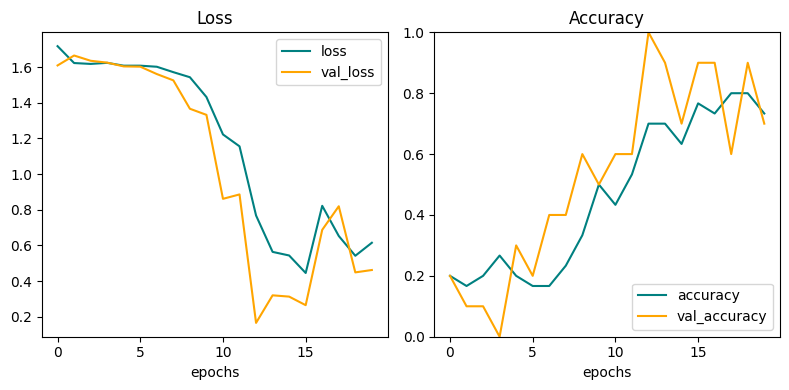

Modal: 2
drive/MyDrive/AI/training_set_for_each_digit/2_classification
Found 50 files belonging to 5 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_25 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_26 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_6

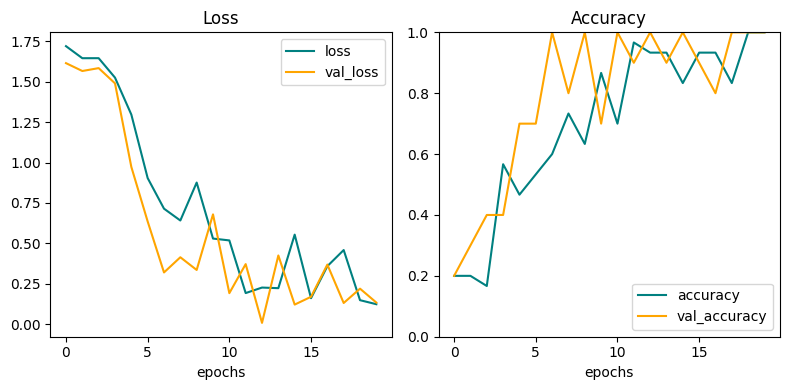

Modal: 3
drive/MyDrive/AI/training_set_for_each_digit/3_classification
Found 50 files belonging to 5 classes.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_29 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_30 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_7

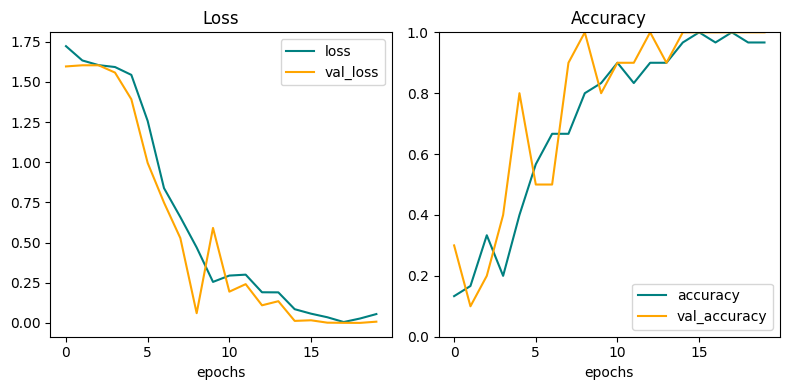

Modal: 4
drive/MyDrive/AI/training_set_for_each_digit/4_classification
Found 50 files belonging to 5 classes.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_33 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_34 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_8

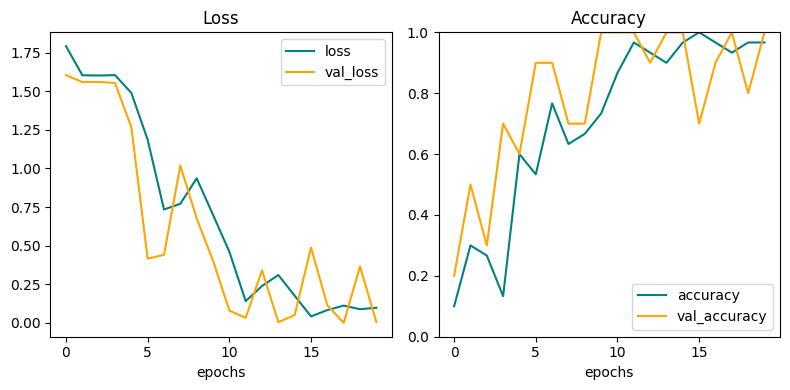

Modal: 5
drive/MyDrive/AI/training_set_for_each_digit/5_classification
Found 50 files belonging to 5 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_37 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_38 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_9

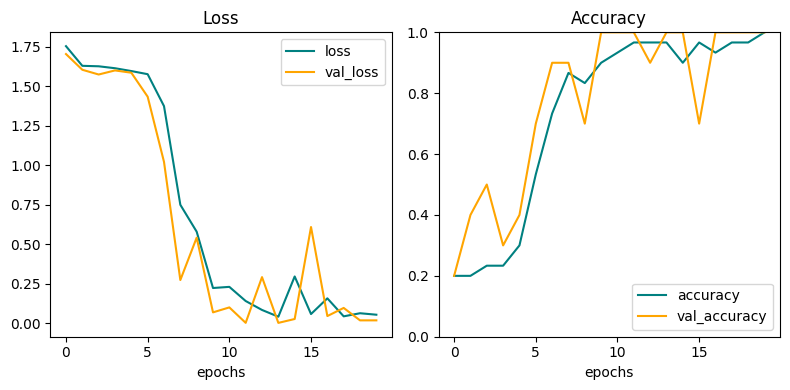

Modal: 6
drive/MyDrive/AI/training_set_for_each_digit/6_classification
Found 50 files belonging to 5 classes.
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_41 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_42 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 flatten_

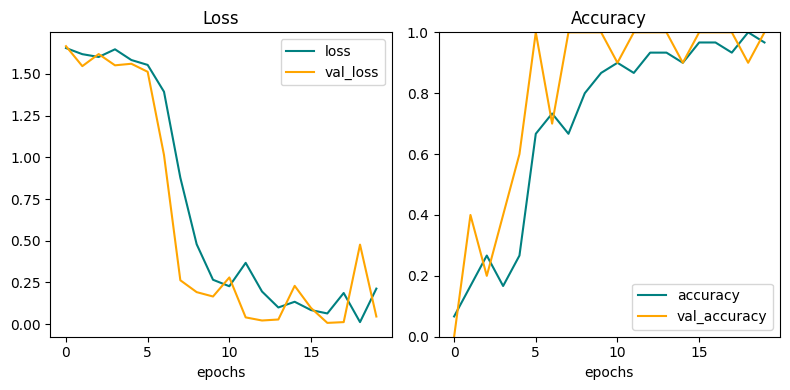

Modal: 7
drive/MyDrive/AI/training_set_for_each_digit/7_classification
Found 50 files belonging to 5 classes.
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_45 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_46 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 flatten_

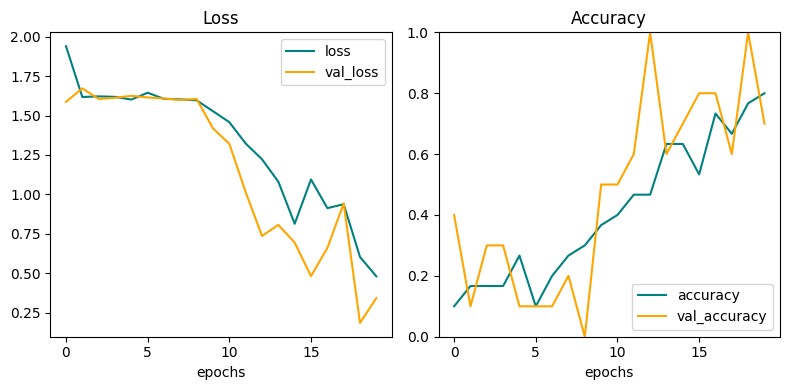

Modal: 8
drive/MyDrive/AI/training_set_for_each_digit/8_classification
Found 50 files belonging to 5 classes.
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_49 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_50 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 flatten_

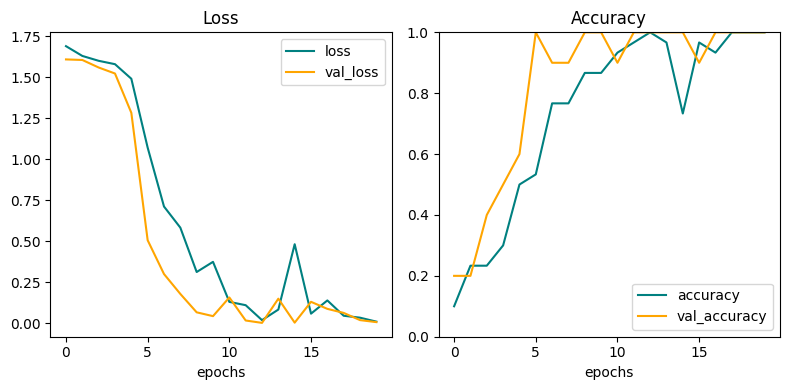

Modal: 9
drive/MyDrive/AI/training_set_for_each_digit/9_classification
Found 50 files belonging to 5 classes.
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 25, 25, 128)       6272      
                                                                 
 conv2d_53 (Conv2D)          (None, 22, 22, 128)       262272    
                                                                 
 conv2d_54 (Conv2D)          (None, 19, 19, 128)       262272    
                                                                 
 conv2d_55 (Conv2D)          (None, 16, 16, 128)       262272    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 flatten_

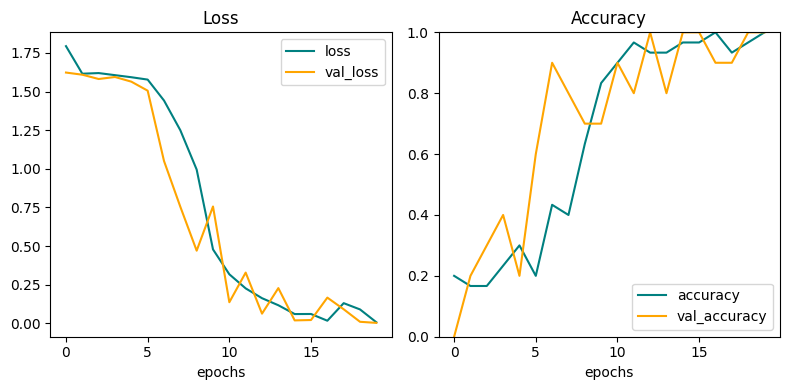

In [ ]:
# Build 10 CNN models using dataset that consists of same handwritten digits collected from every member

for i in range(10):
  print(f'Modal: {i}')
  curr_dir = f'{data_dir}/{i}_classification'
  print(curr_dir)
  data = tf.keras.utils.image_dataset_from_directory(curr_dir, batch_size=10, image_size=(28, 28))

  data = data.map(lambda x, y: (x/255, y))
  scaled_iterator = data.as_numpy_iterator()
  batch = scaled_iterator.next()

  train_size = int(len(data)*.7)
  val_size = int(len(data)*.2)
  test_size = int(len(data)*.1)

  train = data.take(train_size)
  val = data.skip(train_size).take(val_size)
  test = data.skip(train_size + val_size).take(test_size)

  log_dir = 'drive/MyDrive/AI/log'
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

  model = Sequential()

  model.add(Conv2D(128, (4, 4), 1, activation='relu', input_shape=(28, 28, 3)))
  model.add(Conv2D(128, (4, 4), 1, activation='relu'))
  model.add(Conv2D(128, (4, 4), 1, activation='relu'))
  model.add(Conv2D(128, (4, 4), 1, activation='relu'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(5, activation='softmax'))

  model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
  # print(hist.history)

  model.save(os.path.join('drive/MyDrive/AI/models', f'handwriting_{i}_recognition_model.h5'))

  fig, axes = plt.subplots(1, 2, figsize=(8, 4))

  axes[0].plot(hist.history['loss'], color='teal', label='loss')
  axes[0].plot(hist.history['val_loss'], color='orange', label='val_loss')
  axes[0].set_xlabel('epochs')
  axes[0].set_title('Loss', fontsize=12)
  axes[0].legend(loc="upper right")

  axes[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
  axes[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
  axes[1].set_xlabel('epochs')
  axes[1].set_title('Accuracy', fontsize=12)
  axes[1].set_ylim(0, 1)
  axes[1].legend(loc="lower right")

  plt.tight_layout()
  plt.show()